# Covid cases

### Initial Configuration

In [33]:
# Importacion de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [34]:
# Leer los datos
df = pd.read_csv('./covid_worldwide.csv')
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [35]:
df.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [37]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df

,serial_number,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   serial_number    231 non-null    int64 
 1   country          231 non-null    object
 2   total_cases      231 non-null    object
 3   total_deaths     225 non-null    object
 4   total_recovered  210 non-null    object
 5   active_cases     212 non-null    object
 6   total_test       213 non-null    object
 7   population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [39]:
df = df.drop('serial_number', axis=1)
df.head()

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [40]:
df.total_cases = df.total_cases.str.replace(',', '')
df.total_deaths = df.total_deaths.str.replace(',', '')
df.total_recovered = df.total_recovered.str.replace(',', '')
df.active_cases = df.active_cases.str.replace(',', '')
df.total_test = df.total_test.str.replace(',', '')
df.population = df.population.str.replace(',', '')

In [42]:
df.isna().sum()

country             0
total_cases         0
total_deaths        6
total_recovered    21
active_cases       19
total_test         18
population          3
dtype: int64

In [44]:
df = df.fillna(0)

In [47]:
df.total_cases = df.total_cases.astype(np.int64)
df.total_deaths = df.total_deaths.astype(np.int64)
df.total_recovered = df.total_recovered.astype(np.int64)
df.active_cases = df.active_cases.astype(np.int64)
df.total_test = df.total_test.astype(np.int64)
df.population = df.population.astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          231 non-null    object
 1   total_cases      231 non-null    int64 
 2   total_deaths     231 non-null    int64 
 3   total_recovered  231 non-null    int64 
 4   active_cases     231 non-null    int64 
 5   total_test       231 non-null    int64 
 6   population       231 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 12.8+ KB


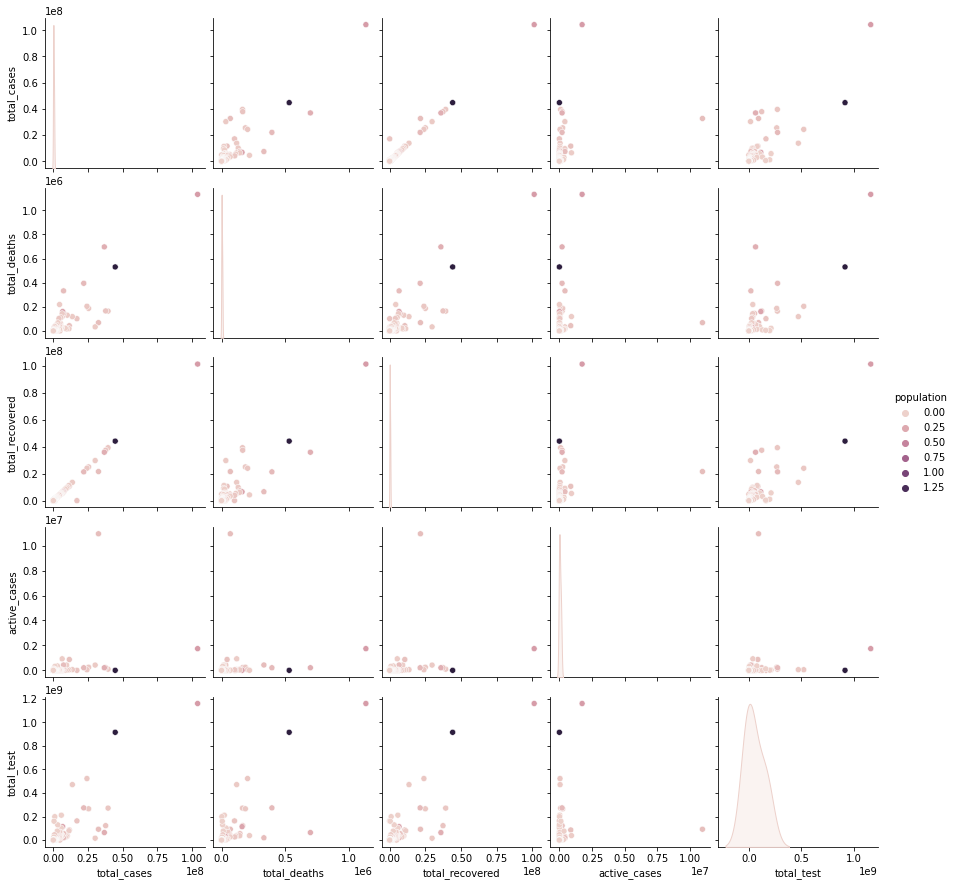

In [71]:
sns.pairplot(
    data=df,
    hue = 'population'
)